<a href="https://colab.research.google.com/github/anagjurchinova/DataScience_2025/blob/main/Mental_Health_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Laboratory Exercise - Run Mode (8 points)

## The Mental Health Diagnosis and Treatment Monitoring Dataset
The dataset contains information on 500 individuals, focusing on mental health diagnoses, treatment plans, and outcomes. Key features include patient demographics such as age and gender, as well as specific mental health conditions (e.g., anxiety, depression, etc.). The dataset also captures symptom severity, mood scores, sleep quality, and stress levels, all rated on a scale of 1 to 10, providing insight into the patient's mental and physical well-being. Additionally, it includes details on treatment plans, including prescribed medications (e.g., SSRIs, antidepressants, etc.), therapy types (e.g., CBT, DBT, etc.), and treatment duration. Progress tracking is also incorporated, with ratings for treatment progress and AI-detected emotional state, alongside adherence to the treatment plan. The 'outcome' attribute, which indicates whether the treatment was improved, deteriorated, or unaffected, serves as the target variable for the analysis, while the remaining attributes can be used to explore and model the factors affecting mental health treatment outcomes.

Load the dataset into a `pandas` data frame.

In [2]:
data = pd.read_csv('/content/sample_data/mental_health_diagnosis_treatment_data.csv')
data.head()

,Patient ID,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Start Date,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
0,1,43.0,Female,Major Depressive Disorder,10,5,8,NaN,Mood Stabilizers,Interpersonal Therapy,2024-01-25,11,NaN,Deteriorated,7,Anxious,66
1,2,40.0,Female,Major Depressive Disorder,9,5,4,7.0,Antipsychotics,Interpersonal Therapy,2024-02-27,11,7.0,No Change,7,Neutral,78
2,3,55.0,Female,Major Depressive Disorder,6,3,4,NaN,SSRIs,Mindfulness-Based Therapy,2024-03-20,14,NaN,Deteriorated,5,Happy,62
3,4,34.0,Female,Major Depressive Disorder,6,3,6,5.0,SSRIs,Mindfulness-Based Therapy,2024-03-29,8,8.0,Deteriorated,10,Excited,72
4,5,52.0,Male,Panic Disorder,7,6,6,8.0,Anxiolytics,Interpersonal Therapy,2024-03-18,12,5.0,Deteriorated,6,Excited,63


Preprocess the input and the output variables appropriately.

In [3]:
data.drop(columns=['Patient ID'], axis=1, inplace=True)
data.head()

,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Start Date,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
0,43.0,Female,Major Depressive Disorder,10,5,8,NaN,Mood Stabilizers,Interpersonal Therapy,2024-01-25,11,NaN,Deteriorated,7,Anxious,66
1,40.0,Female,Major Depressive Disorder,9,5,4,7.0,Antipsychotics,Interpersonal Therapy,2024-02-27,11,7.0,No Change,7,Neutral,78
2,55.0,Female,Major Depressive Disorder,6,3,4,NaN,SSRIs,Mindfulness-Based Therapy,2024-03-20,14,NaN,Deteriorated,5,Happy,62
3,34.0,Female,Major Depressive Disorder,6,3,6,5.0,SSRIs,Mindfulness-Based Therapy,2024-03-29,8,8.0,Deteriorated,10,Excited,72
4,52.0,Male,Panic Disorder,7,6,6,8.0,Anxiolytics,Interpersonal Therapy,2024-03-18,12,5.0,Deteriorated,6,Excited,63


In [5]:
data['Outcome'].isna().sum()

0

Explore the dataset using visualizations of your choice.

In [6]:
def visualize(data, columns, numerical, color):
  plt.figure(figsize=(14,4))
  for i in range(len(columns)):
    plt.subplot(1, len(columns), i+1)
    if numerical:
      plt.hist(data[columns[i]], bins=15, color=color)
    else:
      counts = data.groupby(columns[i]).size()
      plt.bar(counts.index, counts, color=color)

    plt.title(columns[i])

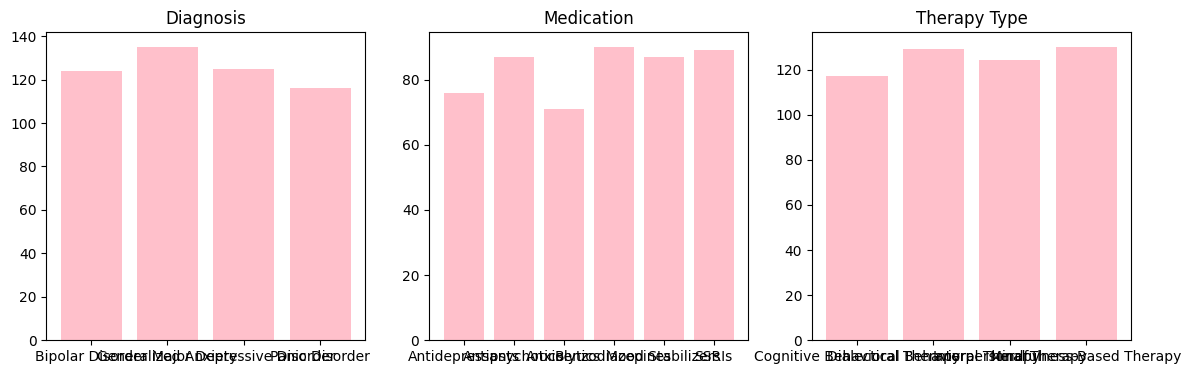

In [7]:
visualize(data, ['Diagnosis', 'Medication', 'Therapy Type'], False, 'pink')

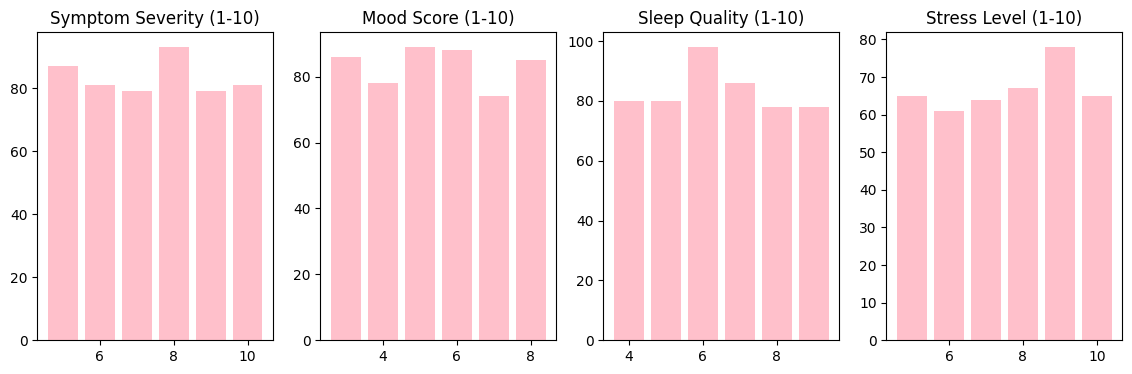

In [8]:
visualize(data, ['Symptom Severity (1-10)', 'Mood Score (1-10)',	'Sleep Quality (1-10)', 'Stress Level (1-10)'], False, 'pink')

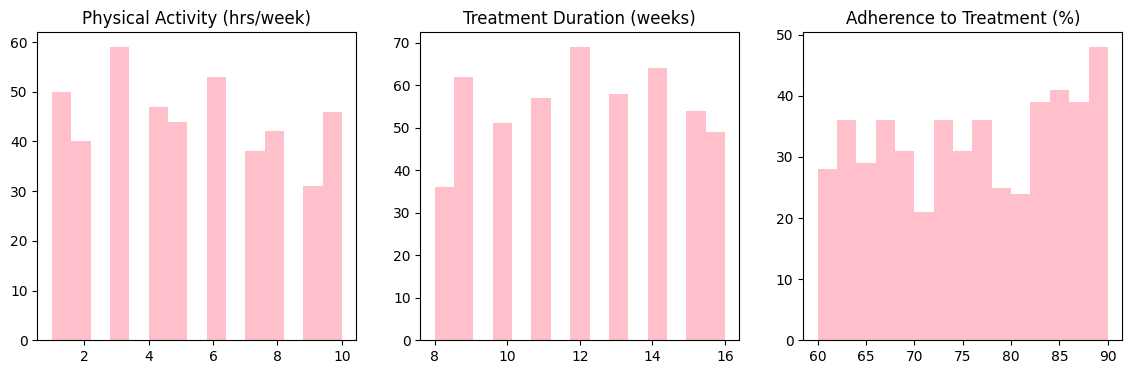

In [9]:
visualize(data, ['Physical Activity (hrs/week)', 'Treatment Duration (weeks)', 'Adherence to Treatment (%)'], True, 'pink')

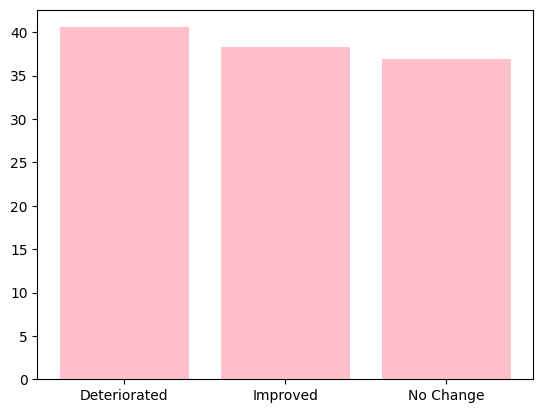

In [11]:
outcome_by_age = data.groupby('Outcome')['Age'].mean()
plt.bar(outcome_by_age.index, outcome_by_age, color='pink')
plt.show()

Check if the dataset is balanced.

In [12]:
data['Outcome'].value_counts()
# The dataset is not balanced for 'No Change'

,count
Outcome,
Deteriorated,171
Improved,170
No Change,159


# Encoding categorical variables

In [13]:
data.head()

,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Start Date,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
0,43.0,Female,Major Depressive Disorder,10,5,8,NaN,Mood Stabilizers,Interpersonal Therapy,2024-01-25,11,NaN,Deteriorated,7,Anxious,66
1,40.0,Female,Major Depressive Disorder,9,5,4,7.0,Antipsychotics,Interpersonal Therapy,2024-02-27,11,7.0,No Change,7,Neutral,78
2,55.0,Female,Major Depressive Disorder,6,3,4,NaN,SSRIs,Mindfulness-Based Therapy,2024-03-20,14,NaN,Deteriorated,5,Happy,62
3,34.0,Female,Major Depressive Disorder,6,3,6,5.0,SSRIs,Mindfulness-Based Therapy,2024-03-29,8,8.0,Deteriorated,10,Excited,72
4,52.0,Male,Panic Disorder,7,6,6,8.0,Anxiolytics,Interpersonal Therapy,2024-03-18,12,5.0,Deteriorated,6,Excited,63


In [16]:
from datetime import datetime

def encode_treatment_date(trdate_str):
  if pd.isna(trdate_str):
    return None

  trdate_str = str(trdate_str)
  trdate = datetime.strptime(trdate_str, '%Y-%m-%d')
  today = datetime.today()
  days_of_treatment = (today - trdate).days

  return days_of_treatment

In [17]:
data['Treatment Start Date'] = data['Treatment Start Date'].apply(encode_treatment_date)

In [21]:
data['Days of treatment'] = data['Treatment Start Date']
data.drop(columns=['Treatment Start Date'], axis=1, inplace=True)
data.head()

,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%),Days of treatment
0,43.0,Female,Major Depressive Disorder,10,5,8,NaN,Mood Stabilizers,Interpersonal Therapy,11,NaN,Deteriorated,7,Anxious,66,308
1,40.0,Female,Major Depressive Disorder,9,5,4,7.0,Antipsychotics,Interpersonal Therapy,11,7.0,No Change,7,Neutral,78,275
2,55.0,Female,Major Depressive Disorder,6,3,4,NaN,SSRIs,Mindfulness-Based Therapy,14,NaN,Deteriorated,5,Happy,62,253
3,34.0,Female,Major Depressive Disorder,6,3,6,5.0,SSRIs,Mindfulness-Based Therapy,8,8.0,Deteriorated,10,Excited,72,244
4,52.0,Male,Panic Disorder,7,6,6,8.0,Anxiolytics,Interpersonal Therapy,12,5.0,Deteriorated,6,Excited,63,255


In [25]:
def label_data(data, columns):
  data_copy = data.copy()
  le = LabelEncoder()

  for column in columns:
    non_nans = data_copy[column].dropna()
    le.fit(non_nans)
    data_copy[column] = data_copy[column].apply(lambda x: le.transform([x])[0] if pd.notna(x) else x)

  return data_copy

In [26]:
data_copy = label_data(data, ['Gender',	'Diagnosis', 'Medication',	'Therapy Type', 'AI-Detected Emotional State'])
data_copy.head()

,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%),Days of treatment
0,43.0,0,2,10,5,8,NaN,4,2,11,NaN,Deteriorated,7,0,66,308
1,40.0,0,2,9,5,4,7.0,1,2,11,7.0,No Change,7,4,78,275
2,55.0,0,2,6,3,4,NaN,5,3,14,NaN,Deteriorated,5,3,62,253
3,34.0,0,2,6,3,6,5.0,5,3,8,8.0,Deteriorated,10,2,72,244
4,52.0,1,3,7,6,6,8.0,2,2,12,5.0,Deteriorated,6,2,63,255


In [28]:
def enc_outcome(x):
  if type(x) == int:
    return x
  if 'deteriorated' in x.lower():
    return -1
  if 'no change' in x.lower():
    return 0
  if 'improved' in x.lower():
    return 1

In [34]:
data_copy['Outcome'] = data_copy['Outcome'].apply(enc_outcome)
data_copy['Outcome']

,Outcome
0,-1
1,0
2,-1
3,-1
4,-1
...,...
495,1
496,-1
497,-1
498,1


## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [35]:
data_copy.isna().mean() * 100

,0
Age,5.0
Gender,0.0
Diagnosis,0.0
Symptom Severity (1-10),0.0
Mood Score (1-10),0.0
Sleep Quality (1-10),0.0
Physical Activity (hrs/week),10.0
Medication,0.0
Therapy Type,0.0
Treatment Duration (weeks),0.0


## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts.

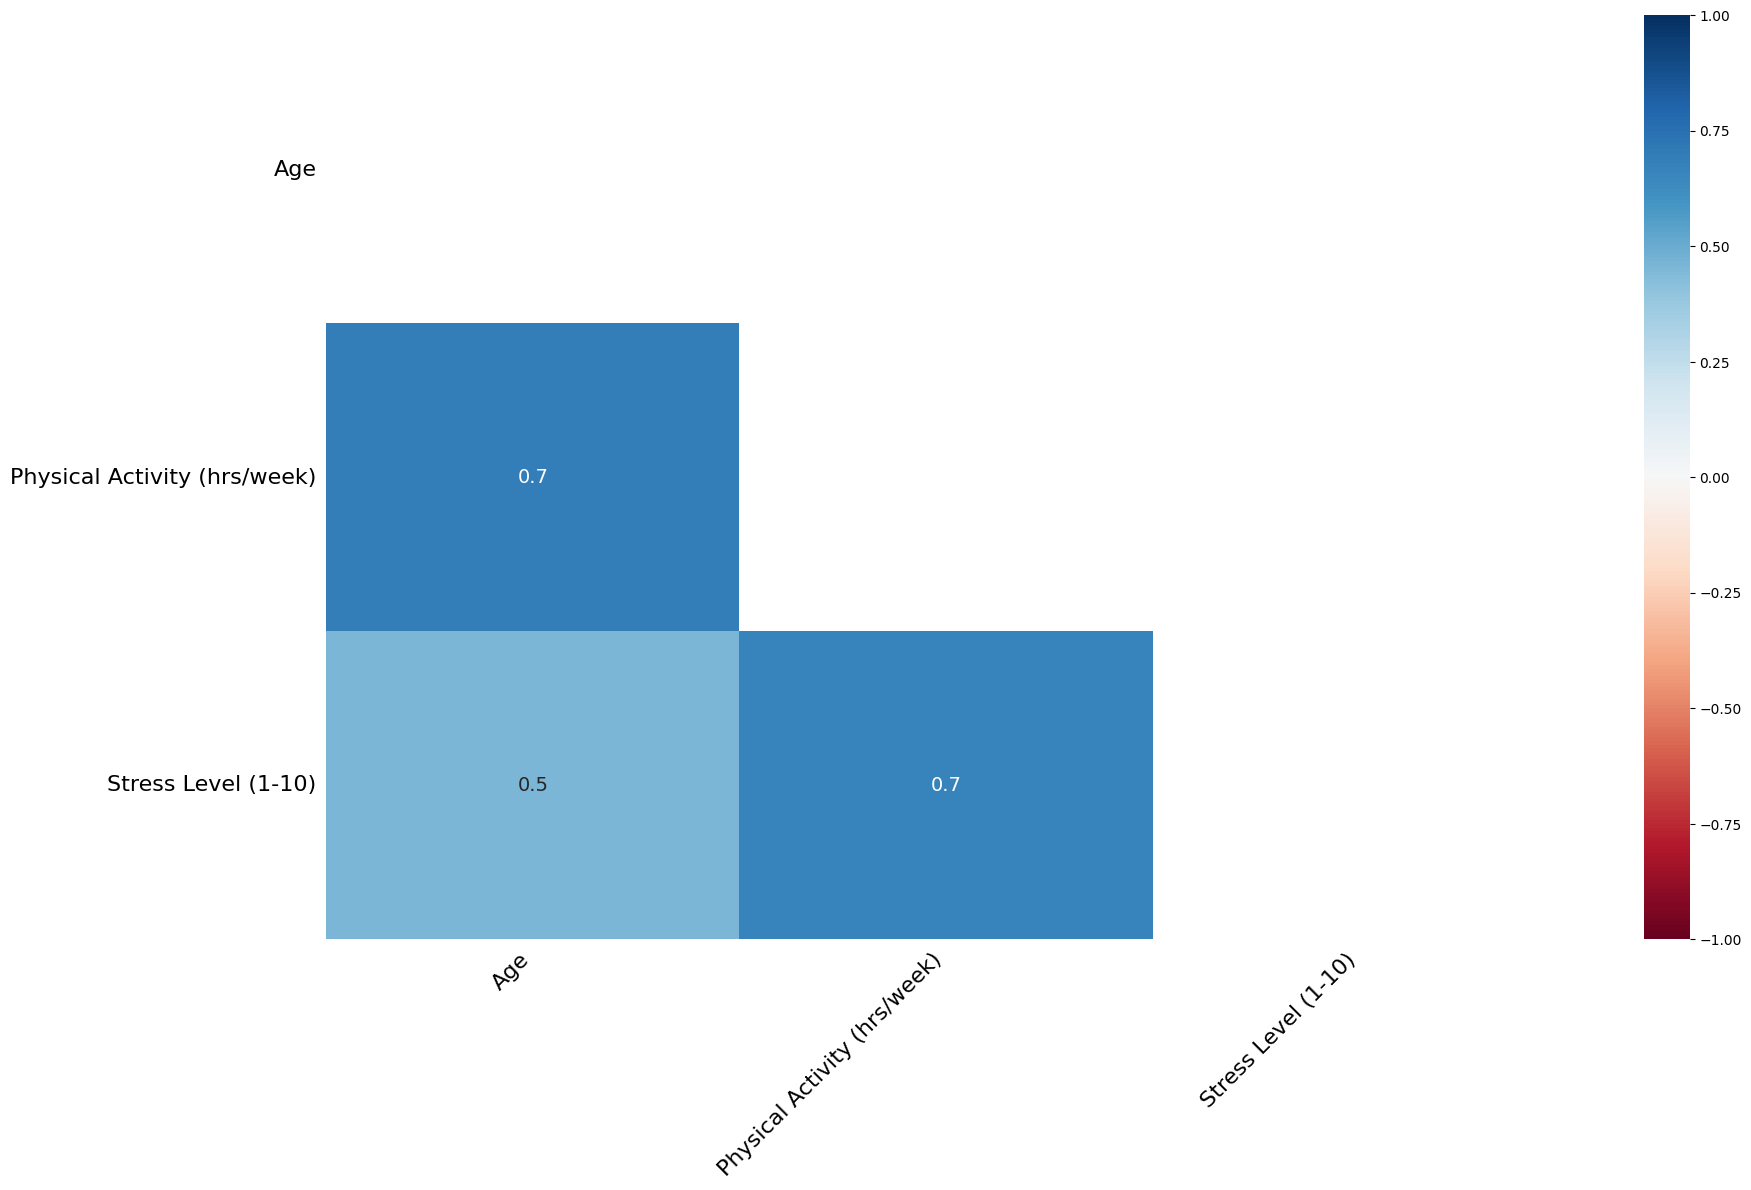

In [36]:
msno.heatmap(data_copy)
plt.show()

In [32]:
data = data.dropna(subset=['Age'], axis=0)

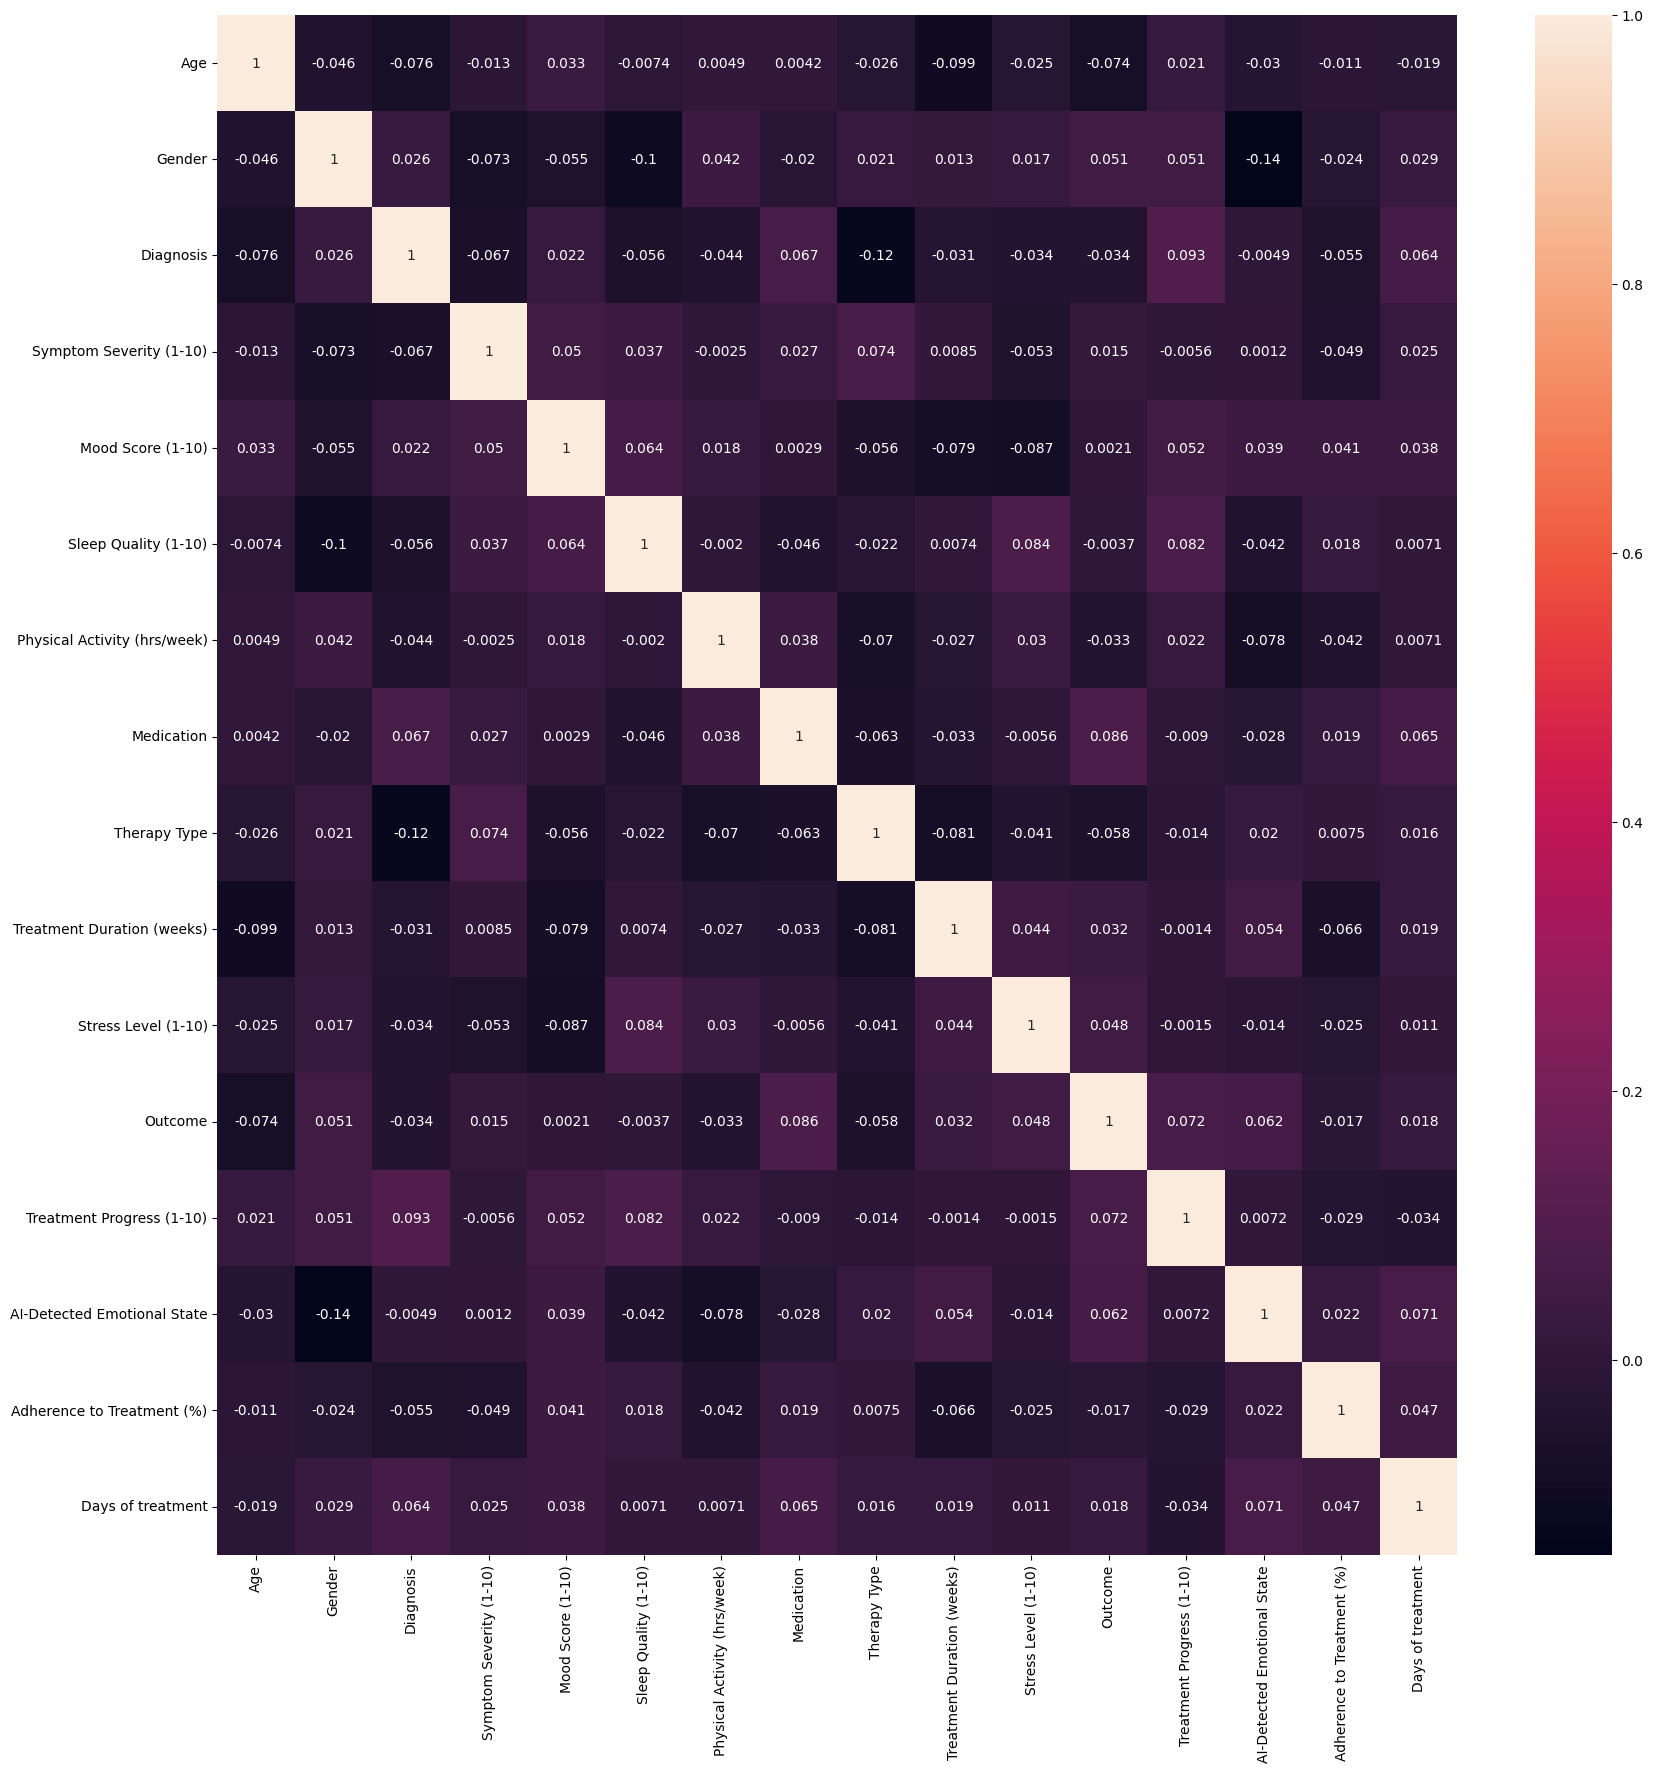

In [37]:
plt.figure(figsize=(20, 20))
sns.heatmap(data_copy.corr(), annot=True)
plt.show()

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [38]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Physical Activity (hrs/week)', 'Stress Level (1-10)']])
knn_imputer = KNNImputer(n_neighbors=5)
imputed_data = knn_imputer.fit_transform(scaled_data)
data[['Physical Activity (hrs/week)', 'Stress Level (1-10)']] = imputed_data

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [39]:
from sklearn.model_selection import train_test_split
data_new = data_copy.copy()
data_new.drop(columns=['Outcome'], axis=1, inplace=True)

X_train, X_test, Y_train, Y_test = train_test_split(data_new[data_new.columns], data_copy['Outcome'], test_size=0.2)

## Feature Scaling
Standardize the features appropriately.

In [ ]:
# No need to scale the features for a DT model.

## Model Selection

Choose and train an approriate model for the given task.

In [77]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model = model.fit(X_train,Y_train)

Use the trained model to make predictions for the test set.

In [78]:
predictions = model.predict(X_test)

Assess the performance of the model by using different classification metrics.

In [79]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(Y_test, predictions))

Accuracy: 0.3


# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune at least one hyper-parameter using a cross-validation with grid search. This involves systematically experimenting with various values for the hyper-parameter(s) and evaluating the model's performance using cross-validation. Upon determining the most suitable value(s) for the hyper-parameter(s), evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [80]:
from sklearn.model_selection import train_test_split
data_new = data_copy.copy()
data_new.drop(columns=['Outcome'], axis=1, inplace=True)

X_train, X_test, Y_train, Y_test = train_test_split(data_new[data_new.columns], data_copy['Outcome'], test_size=0.1)

## Feature Scaling
Standardize the features appropriately.

In [ ]:
# DT model does not require scaling.

## Fine-tuning the Hyperparameters
Experiment with various values for the chosen hyperparameter(s) and evaluate the model's performance using cross-validation.

In [83]:
from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier()
param_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [4, 5, 6],
    'min_samples_leaf' : [10, 20, 50, 60]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, Y_train)
print(f'Best params: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best params: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 50}
Best score: 0.38


## Final Assessment of the Model Performance
Upon determining the most suitable hyperparameter(s), evaluate the model's performance on a test set for final assessment.

In [84]:
model = grid_search.best_estimator_
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(Y_test, predictions))

Accuracy: 0.36
